   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  12

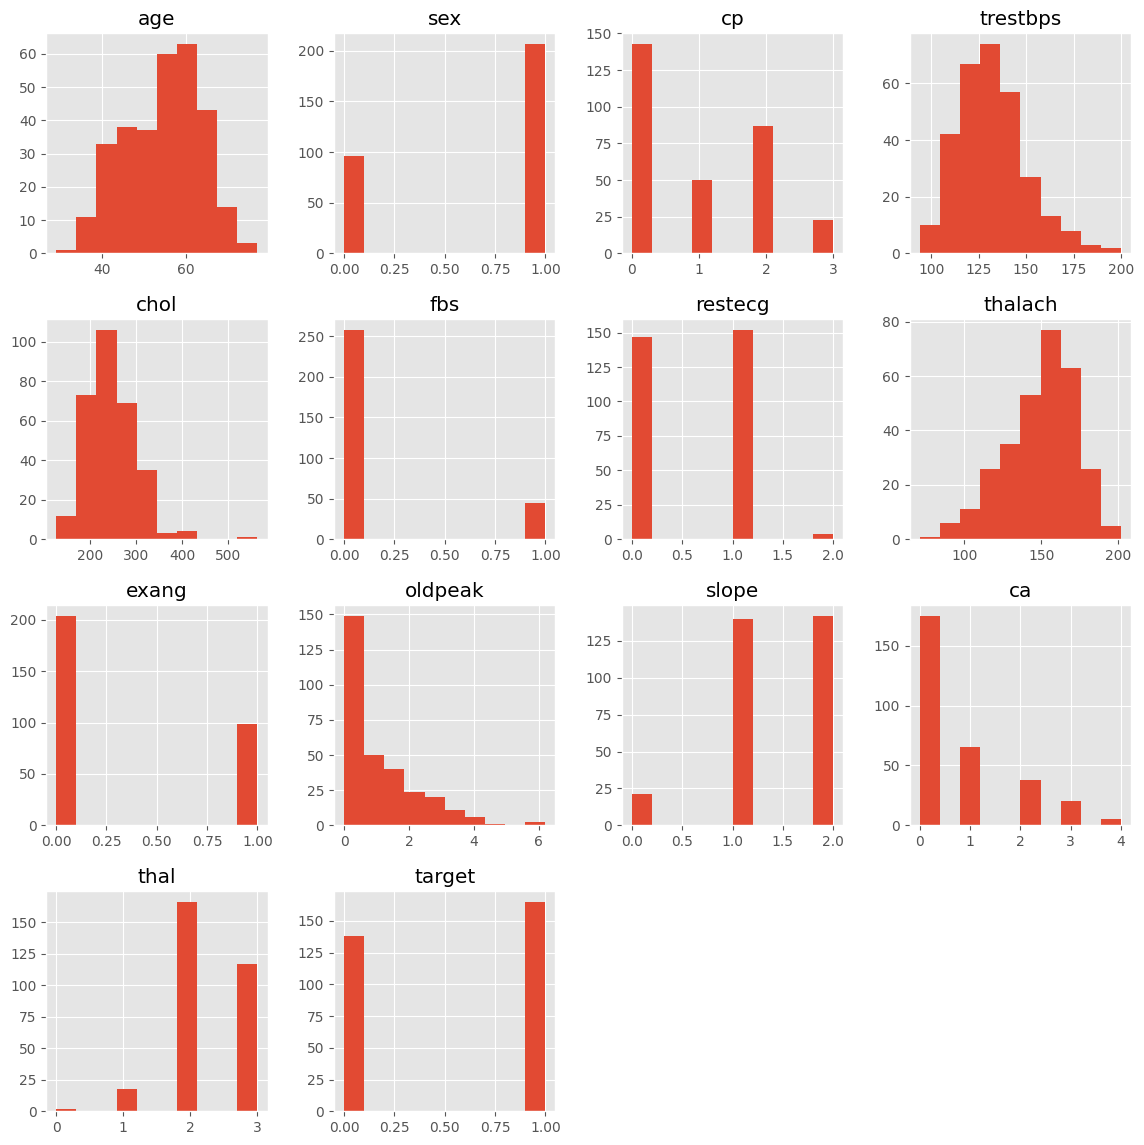

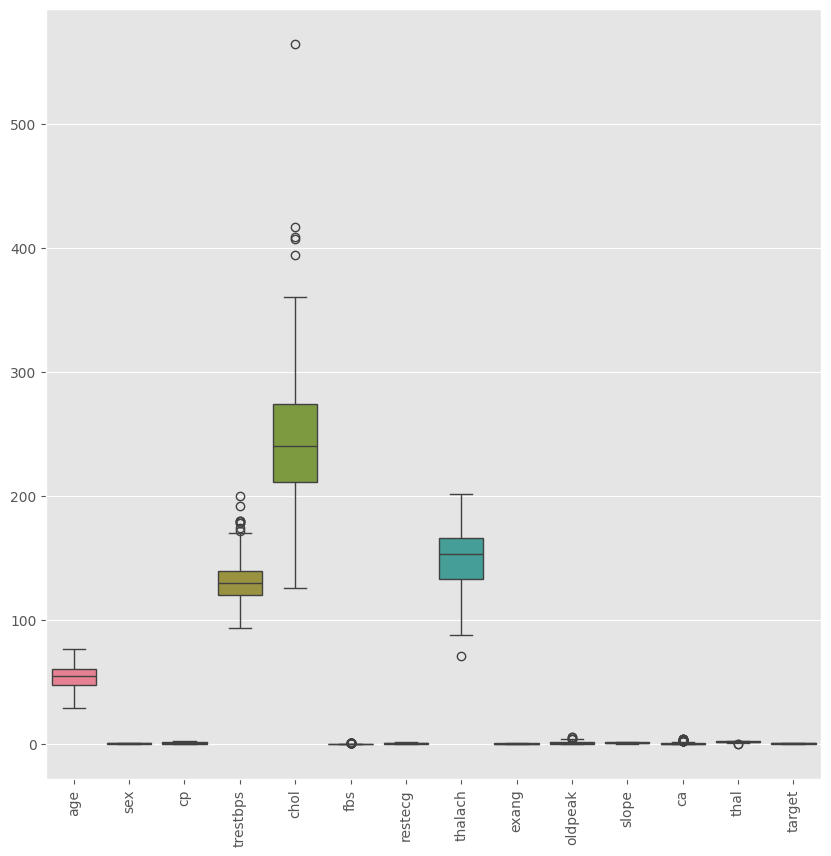

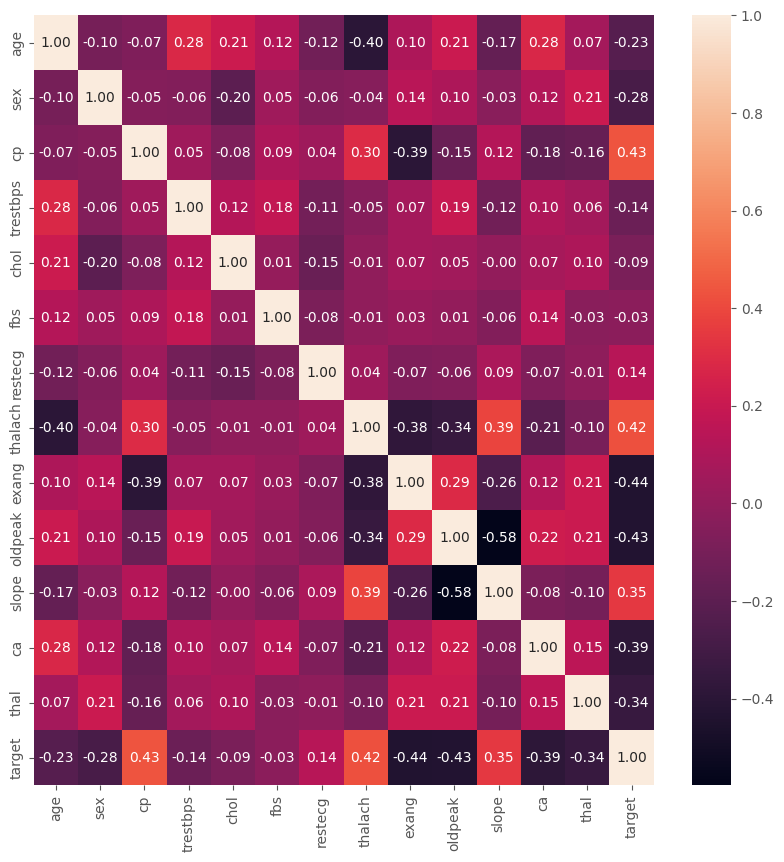

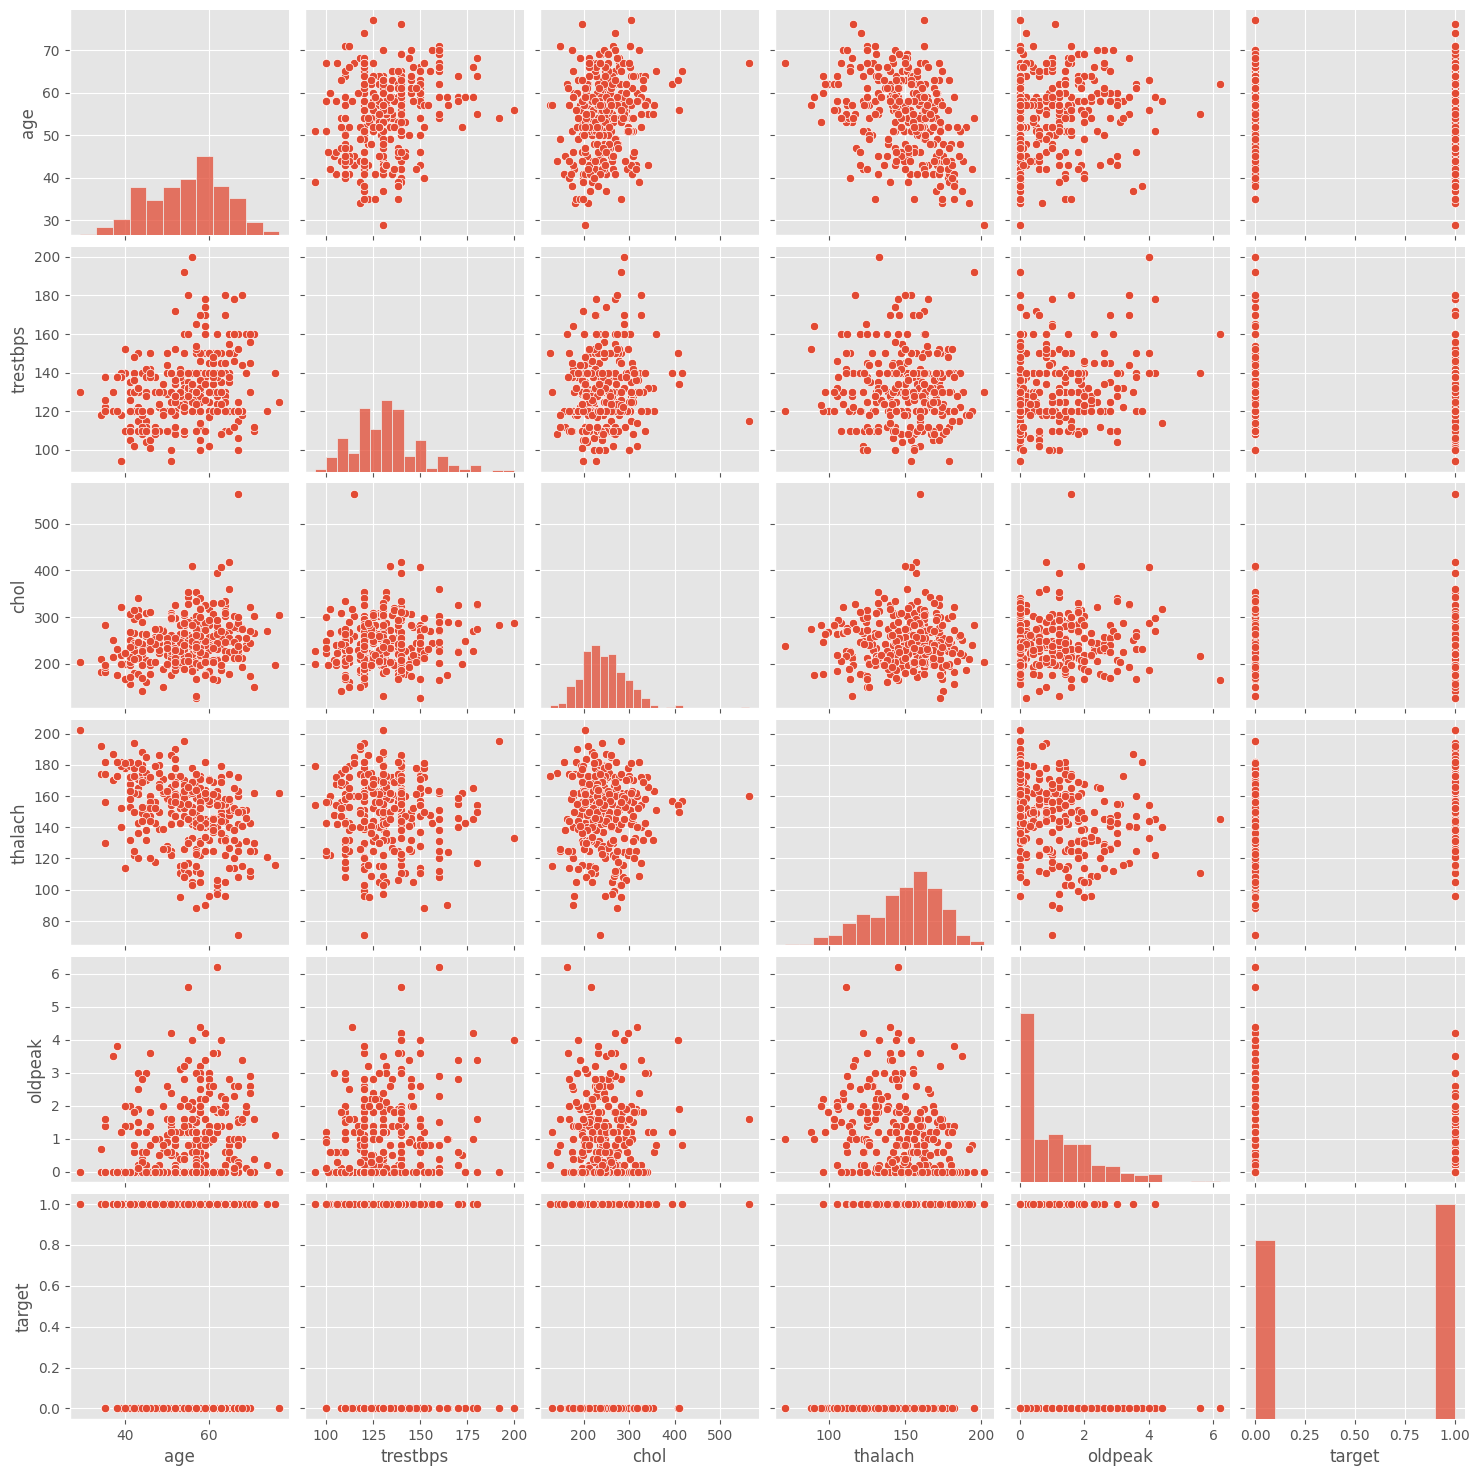

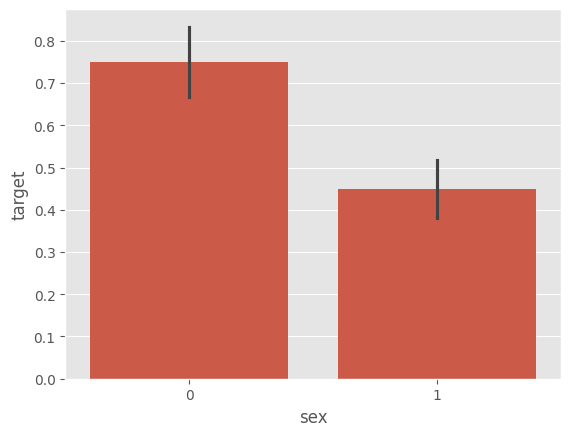

RandomForestClassifier metrics:
Accuracy: 0.9180
Precision: 0.9459
Recall: 0.9211
F1 Score: 0.9333

LogisticRegression metrics:
Accuracy: 0.8852
Precision: 0.9429
Recall: 0.8684
F1 Score: 0.9041

KNeighborsClassifier metrics:
Accuracy: 0.9836
Precision: 0.9744
Recall: 1.0000
F1 Score: 0.9870

SVC metrics:
Accuracy: 0.9344
Precision: 0.9474
Recall: 0.9474
F1 Score: 0.9474



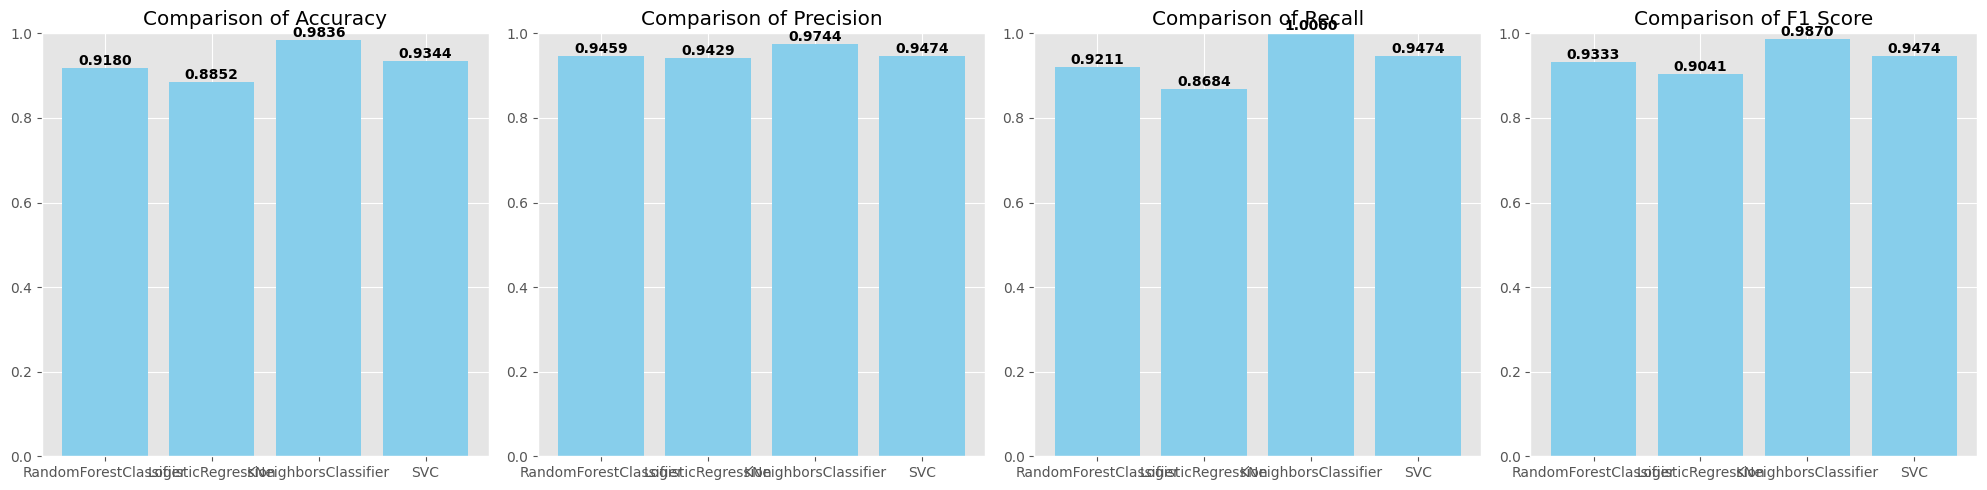

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Desktop/heart_prediction_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Histograms for numerical features
df.hist(figsize=(14,14))
plt.show()

# Box plots for examining outliers and distributions
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Pair plot for relations between pairs of features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']])
plt.show()

# Analyze the relationship between the target variable and features
sns.barplot(x='sex', y='target', data=df)
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Desktop/heart_prediction_data.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets with the specified random_state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=72)

# Initialize a dictionary to store models and their parameters
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=72),
    'LogisticRegression': LogisticRegression(max_iter=1000, penalty='l2', C=1, random_state=72), # Assuming C=1 is the best after the search
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=19),
    'SVC': SVC(C=0.1, gamma=0.001, kernel='linear', random_state=72)
}

# Initialize dictionaries to store metrics of each model
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    accuracy_scores[model_name] = accuracy
    precision_scores[model_name] = precision
    recall_scores[model_name] = recall
    f1_scores[model_name] = f1
    
    print(f"{model_name} metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Now let's plot the metrics for comparison
metrics = [accuracy_scores, precision_scores, recall_scores, f1_scores]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set the style
plt.style.use('ggplot')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for ax, metric, name in zip(axes, metrics, metric_names):
    ax.bar(metric.keys(), metric.values(), color='skyblue')
    ax.set_title(f'Comparison of {name}')
    ax.set_ylim(0, 1)
    for i, value in enumerate(metric.values()):
        ax.text(i, value, f"{value:.4f}", ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)  # For reproducibility
random_indices = np.random.choice(X.shape[0], size=3, replace=False)
input_samples = X.iloc[random_indices]

# Standardize the input samples
input_samples_scaled = scaler.transform(input_samples)

# Predict the target for the input samples using the KNN model
knn_model = models['KNeighborsClassifier']  # Retrieve the trained KNN model from the models dictionary
predictions = knn_model.predict(input_samples_scaled)

# Display the predictions and actual values
actual_targets = y.iloc[random_indices].values
for i, prediction in enumerate(predictions):
    print(f"Sample {i+1} prediction by KNN: {prediction}, Actual target: {actual_targets[i]}")

Sample 1 prediction by KNN: 0, Actual target: 0
Sample 2 prediction by KNN: 1, Actual target: 1
Sample 3 prediction by KNN: 1, Actual target: 0
